In [19]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [3]:
clients = pd.read_csv('clients.csv')
servies = pd.read_csv('servies.csv')
category = pd.read_csv('category.csv')

display(clients)
display(servies)
display(category)


,id_k,surname
0,1,patrylo
1,2,lukianchuk
2,3,boyko
3,0,Unknown


,date,id_k,id_c,weight
0,2024-01-02,1,1,3
1,2024-01-02,2,1,5
2,2024-01-03,1,3,4
3,2024-01-03,0,4,6
4,2024-01-04,3,2,2


,id_c,category,pricePerKg
0,1,Куртка,40
1,2,Шовк,50
2,3,Штани,35
3,4,Футболка,15


In [4]:
data = pd.merge(servies,category,on='id_c',how='inner')
data = data.merge(clients,on='id_k',how='inner')
display(data)

,date,id_k,id_c,weight,category,pricePerKg,surname
0,2024-01-02,1,1,3,Куртка,40,patrylo
1,2024-01-02,2,1,5,Куртка,40,lukianchuk
2,2024-01-03,1,3,4,Штани,35,patrylo
3,2024-01-03,0,4,6,Футболка,15,Unknown
4,2024-01-04,3,2,2,Шовк,50,boyko


In [5]:
data.loc[data['id_c']!=0, 'total'] = data['weight'] * data['pricePerKg'] * 0.9
display(data)

,date,id_k,id_c,weight,category,pricePerKg,surname,total
0,2024-01-02,1,1,3,Куртка,40,patrylo,108.0
1,2024-01-02,2,1,5,Куртка,40,lukianchuk,180.0
2,2024-01-03,1,3,4,Штани,35,patrylo,126.0
3,2024-01-03,0,4,6,Футболка,15,Unknown,81.0
4,2024-01-04,3,2,2,Шовк,50,boyko,90.0


In [17]:
def summ_by_category():
    result = data.groupby('category')['total'].sum().reset_index()
    result = result.sort_values(by='total', ascending=False)
    return result
display(summ_by_category())

,category,total
0,Куртка,288.0
3,Штани,126.0
2,Шовк,90.0
1,Футболка,81.0


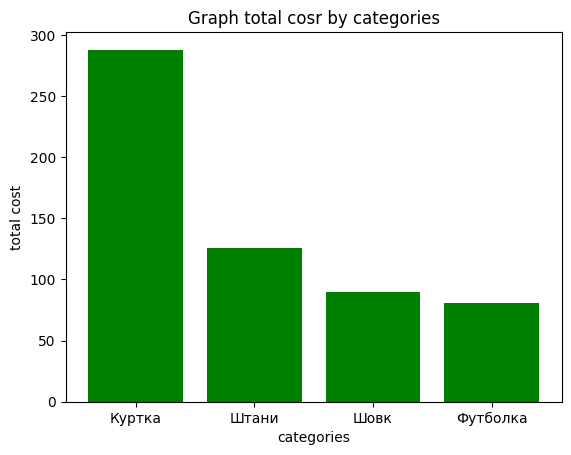

In [20]:
def bar_graph():
    result =summ_by_category()
    plt.bar(result['category'],result['total'],color='green')
    plt.xlabel('categories')
    plt.ylabel('total cost')
    plt.title('Graph total cosr by categories')
    plt.show()
bar_graph()

In [36]:
data['date'] = pd.to_datetime(data['date'])

start_date = widgets.DatePicker(
    description='Start date:',
    value = data['date'].min()    
)

end_date = widgets.DatePicker(
    description='End date:',
    value = data['date'].max()
)

def show(start,end):
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)

    flt = (data['date'] >= start) & (data['date'] <= end)
    filtred = data[flt]

    filtred = filtred.groupby('category')['total'].sum().reset_index()
    filtred = filtred.sort_values(by='total', ascending=False)
    result = filtred.iloc[0]
    display(result)

widget = widgets.interactive(show,start= start_date,end=end_date)
display(widget)


interactive(children=(DatePicker(value=Timestamp('2024-01-02 00:00:00'), description='Start date:', step=1), D…